In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,r2_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.tree import DecisionTreeClassifier

In [13]:
df = pd.read_csv("./data/winequality-red.csv")

In [3]:
df.shape

(1599, 12)

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.duplicated().sum()

240

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [224]:
X = df.drop(columns=["quality"],axis=1)
# X = df[["fixed acidity","volatile acidity","sulphates","total sulfur dioxide","alcohol"]]
Y = df["quality"]

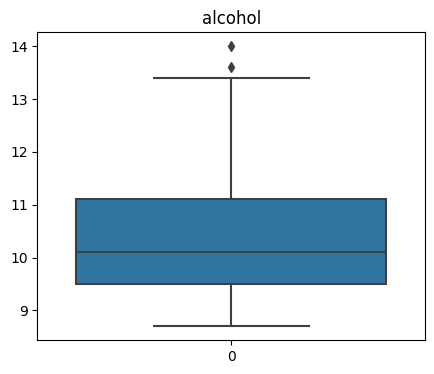

In [225]:
i="alcohol"
plt.figure(figsize=(5,4))
sns.boxplot(df[i])
plt.title(i)
plt.show() 

In [112]:
df  = df[df["sulphates"] < 1.0]

In [228]:
df.shape

(982, 12)

In [226]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

In [227]:
std = StandardScaler()

std.fit(xtrain)

xtrf = std.transform(xtrain)
xtestTRF = std.transform(xtest)

C:\Users\vipin\AppData\Local\Temp\ipykernel_11232\3886529257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fixed acidity"])
c:\Users\vipin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fixed acidity', ylabel='Density'>

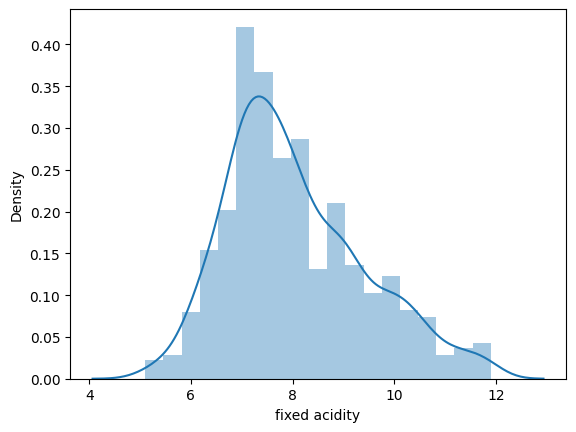

In [229]:
sns.distplot(df["fixed acidity"])

In [230]:
pt = PowerTransformer(method="yeo-johnson")
pt.fit(xtrf)

xtrainTrf = pt.transform(xtrf + 0.00001) 
xtestTRFData = pt.transform(xtestTRF + 0.0001)

In [231]:
lr = LogisticRegression()

lr.fit(xtrainTrf,ytrain)


y_pred = lr.predict(xtestTRFData)


print(accuracy_score(y_pred=y_pred, y_true=ytest))
print(r2_score(y_pred=y_pred,y_true=ytest))

0.6040609137055838
0.18059977405771788


In [232]:
dt = DecisionTreeClassifier(max_depth=5,random_state=34)

dt.fit(xtrainTrf,ytrain)

print("Important Features " ,dt.feature_importances_)

y_pred = dt.predict(xtestTRFData)

print(accuracy_score(y_pred=y_pred, y_true=ytest))
print(r2_score(y_pred=y_pred,y_true=ytest))

Important Features  [0.04320435 0.11976516 0.         0.02259719 0.01212532 0.01275868
 0.10055011 0.02681678 0.04208038 0.17365654 0.44644547]
0.5583756345177665
0.08955530450857552


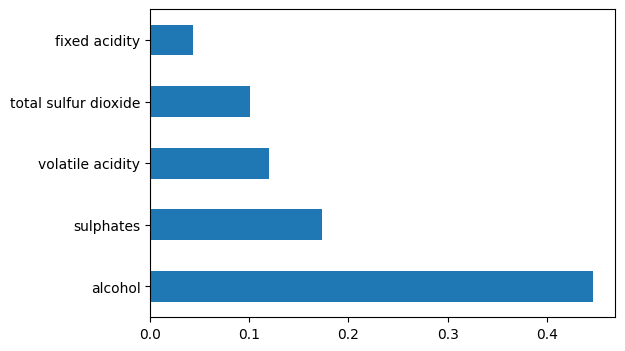

In [233]:
importance = pd.Series(dt.feature_importances_,
                       index = xtrain.columns.values)
importance.nlargest(5).plot(kind='barh',
                            figsize = (6,4));

In [234]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10,min_samples_leaf=2,n_estimators=200,min_samples_split=10)

model.fit(xtrain,ytrain)
 

y_pred = model.predict(xtest)
y_test = ytest

print(accuracy_score(y_pred,  y_test))
from sklearn.metrics import classification_report, f1_score

0.6294416243654822


In [235]:
# from sklearn.model_selection import GridSearchCV


# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# grid_search.fit(xtrainTrf, ytrain)

# # View the best parameters and best score
# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# # Evaluate the model on the test set
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(xtestTRFData)
# y_test = ytest
# print(classification_report(y_test, y_pred))

In [ ]:
# import xgboost as xgb

# xgb_clf = xgb.XGBClassifier(random_state=42)
# xgb_param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0]
# }

# xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
# xgb_grid_search.fit(xtrainTrf, ytrain)

# best_xgb = xgb_grid_search.best_estimator_
# y_pred_xgb = best_xgb.predict(xtestTRFData)

# y_test = ytest
# print("XGBoost Classifier:")
# print(f"Best parameters: {xgb_grid_search.best_params_}")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
# print(classification_report(y_test, y_pred_xgb))